In [1]:
# First step, import libraries and then dataset
import numpy as np 
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt
import os 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU

In [2]:
# Import the dataset and encode the date
df = pd.read_csv("/Users/salonikhanna/Desktop/FINAL PROJECT/BTC_USD_2018-10-11_2021-08-11-CoinDesk.csv") 
print(df.Price.shape)

(1035,)


In [3]:
# We will predict the prices for 50 days, so splitting the data accordingly
prediction_days = 50
df_train= df.Price[:len(df.Price)-prediction_days]
df_test= df.Price[len(df.Price)-prediction_days:]

In [4]:
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [5]:
# Some preprocessing, like normalizing the values, reshaping, etc. The data is a time series data, so the output to every instance is the next instance. 
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [6]:
# Initialising
regressor2 = Sequential()

# Adding the GRU layer
regressor2.add(GRU(units = 4, activation = 'relu', input_shape = (None, 1)))

# Adding the output layer
regressor2.add(Dense(units = 1))

# Compiling the GRU using Adam optimizer and MSE loss
regressor2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the GRU to the Training set
regressor2.fit(X_train, y_train, batch_size = 15, epochs = 50)

2021-10-28 14:40:52.617848: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-28 14:40:53.247912: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
66/66 [==============================] - 4s 4ms/step - loss: 0.0240
Epoch 2/50
66/66 [==============================] - 0s 5ms/step - loss: 0.0128A: 0s - loss: 
Epoch 3/50
66/66 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 4/50
66/66 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 5/50
66/66 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 6/50
66/66 [==============================] - 0s 5ms/step - loss: 6.0349e-04
Epoch 7/50
66/66 [==============================] - 0s 3ms/step - loss: 3.4339e-04
Epoch 8/50
66/66 [==============================] - 0s 5ms/step - loss: 2.8865e-04
Epoch 9/50
66/66 [==============================] - 0s 3ms/step - loss: 2.7948e-04
Epoch 10/50
66/66 [==============================] - 0s 4ms/step - loss: 2.7775e-04
Epoch 11/50
66/66 [==============================] - 0s 4ms/step - loss: 2.7743e-04
Epoch 12/50
66/66 [==============================] - 0s 4ms/step - loss: 2.7829e-04
Epoch 1

In [7]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
# Prediction from the trained GRU network
predicted_BTC_price = regressor2.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)
er2 = np.mean((predicted_BTC_price-test_set)**2)
print("Mean Square Error (MSE) using GRU:", er2)

Mean Square Error (MSE) using GRU: 35452095.680718765


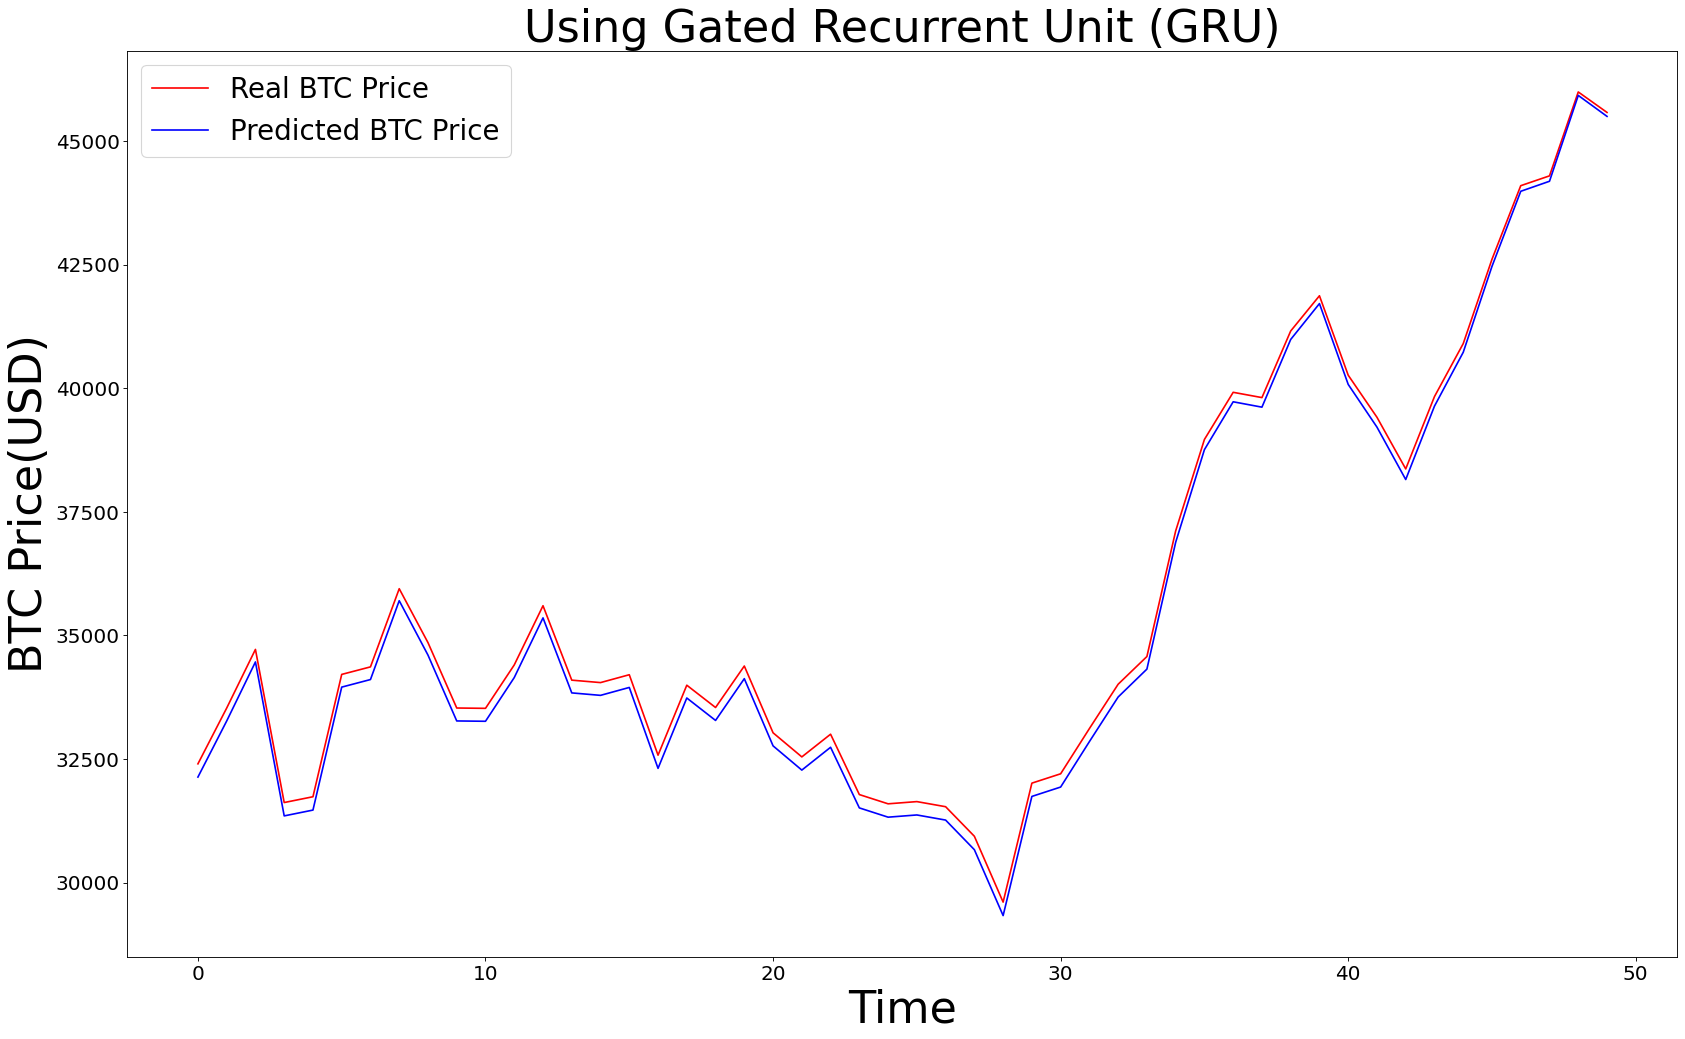

In [8]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('Using Gated Recurrent Unit (GRU)', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df['Date']
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

In [9]:
predicted_BTC_price

array([[32137.098],
       [33270.785],
       [34465.23 ],
       [31352.053],
       [31469.613],
       [33955.996],
       [34109.26 ],
       [35703.37 ],
       [34603.5  ],
       [33272.035],
       [33265.35 ],
       [34149.293],
       [35356.184],
       [33839.066],
       [33789.38 ],
       [33949.43 ],
       [32313.193],
       [33736.15 ],
       [33282.297],
       [34126.86 ],
       [32768.11 ],
       [32278.219],
       [32739.393],
       [31513.63 ],
       [31326.186],
       [31370.938],
       [31267.525],
       [30668.62 ],
       [29335.93 ],
       [31745.684],
       [31935.318],
       [32853.926],
       [33756.227],
       [34320.316],
       [36884.34 ],
       [38757.902],
       [39725.758],
       [39617.15 ],
       [40986.07 ],
       [41711.312],
       [40077.176],
       [39213.27 ],
       [38153.883],
       [39637.996],
       [40726.973],
       [42464.387],
       [43982.277],
       [44185.168],
       [45920.97 ],
       [45497.016]],